In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Your code here


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fert = pd.read_csv(r'C:\Users\91944\OneDrive\Desktop\Final\Crop_Recommendation_System\Data-processed\FertilizerData.csv')
crop = pd.read_csv(r'C:\Users\91944\OneDrive\Desktop\Final\Crop_Recommendation_System\Data-processed\CropData.csv')

In [4]:
fert.head()

,Unnamed: 0,Crop,N,P,K,pH
0,0,rice,80,40,40,5.5
1,3,maize,80,40,20,5.5
2,5,chickpea,40,60,80,5.5
3,12,kidneybeans,20,60,20,5.5
4,13,pigeonpeas,20,60,20,5.5


In [5]:
fert.drop('Unnamed: 0',axis = 1,inplace = True)

In [6]:
fert.head()

,Crop,N,P,K,pH
0,rice,80,40,40,5.5
1,maize,80,40,20,5.5
2,chickpea,40,60,80,5.5
3,kidneybeans,20,60,20,5.5
4,pigeonpeas,20,60,20,5.5


In [7]:
fert.describe()

,N,P,K,pH
count,22.000000,22.000000,22.000000,22.000000
mean,50.454545,45.681818,48.181818,5.409091
std,36.315715,32.634172,51.698426,0.590326
min,20.000000,10.000000,10.000000,4.000000
25%,20.000000,20.000000,20.000000,5.500000
50%,30.000000,40.000000,30.000000,5.500000
75%,80.000000,60.000000,50.000000,5.500000
max,120.000000,125.000000,200.000000,6.500000


In [8]:
fert['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

Text(0, 0.5, 'Nitrogen (mg/g)')

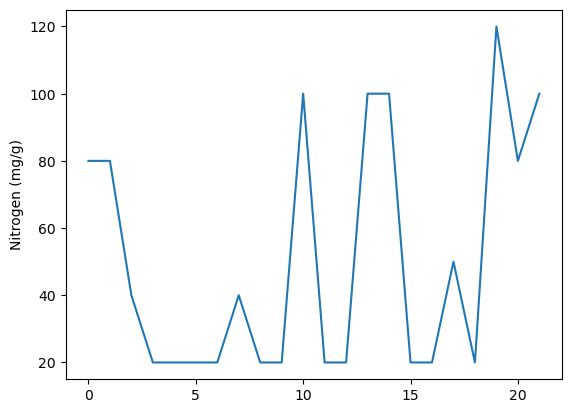

In [9]:
plt.plot(fert["N"])
plt.ylabel('Nitrogen (mg/g)')

Text(0, 0.5, 'Phosphorus (mg/g)')

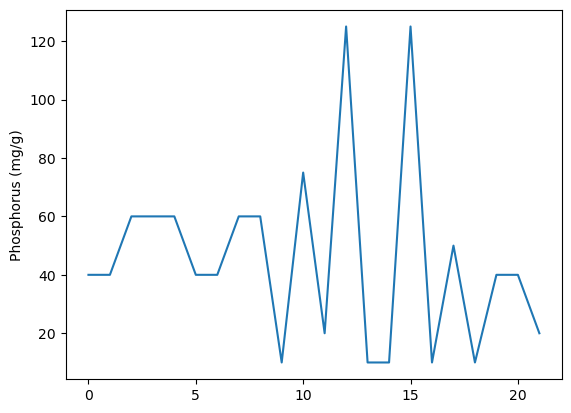

In [10]:
plt.plot(fert["P"])
plt.ylabel('Phosphorus (mg/g)')

Text(0, 0.5, 'Potassium (mg/g)')

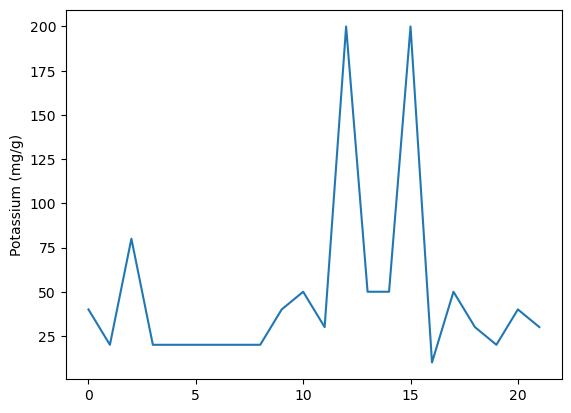

In [11]:
plt.plot(fert["K"])
plt.ylabel('Potassium (mg/g)')

<Axes: >

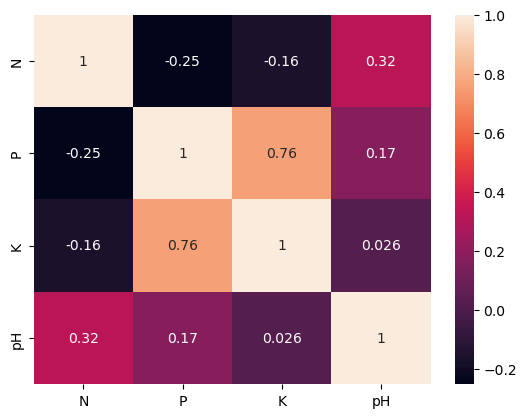

In [12]:
sns.heatmap(fert.corr(),annot=True)

In [13]:
r_fert = fert
crop

,Unnamed: 0,temperature,humidity,ph,rainfall,label
0,0,20.879744,82.002744,6.502985,202.935536,rice
1,1,21.770462,80.319644,7.038096,226.655537,rice
2,2,23.004459,82.320763,7.840207,263.964248,rice
3,3,26.491096,80.158363,6.980401,242.864034,rice
4,4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...
2195,895,26.774637,66.413269,6.780064,177.774507,coffee
2196,896,27.417112,56.636362,6.086922,127.924610,coffee
2197,897,24.131797,67.225123,6.362608,173.322839,coffee
2198,898,26.272418,52.127394,6.758793,127.175293,coffee


In [14]:
crop.drop('Unnamed: 0', axis = 1, inplace = True)

In [15]:
crop.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


<b>Adding randomness in the range of tolerance</b>

In [16]:
import random
temp = pd.DataFrame(columns = ['N','P','K'])
for i in range(0,len(crop)):
    t_crop = crop.label.iloc[i]
    
    N = r_fert[r_fert['Crop'] == t_crop]["N"].iloc[0] + random.randint(-20,20)
    P = r_fert[r_fert['Crop'] == t_crop]["P"].iloc[0] + random.randint(-5,20)
    K = r_fert[r_fert['Crop'] == t_crop]["K"].iloc[0] + random.randint(-5,5)
    d = {"N":N,"P":P,"K":K}
    
    temp = temp.append(d,ignore_index = True)

In [17]:
temp

,N,P,K
0,70,41,37
1,70,48,44
2,89,52,40
3,74,53,45
4,90,53,43
...,...,...,...
2195,106,28,31
2196,106,39,29
2197,107,28,32
2198,82,15,31


Merging Crop and fertilizer data

In [18]:
crop['N'] = temp['N']
crop['P'] = temp['P']
crop['K'] = temp['K']

In [19]:
crop

,temperature,humidity,ph,rainfall,label,N,P,K
0,20.879744,82.002744,6.502985,202.935536,rice,70,41,37
1,21.770462,80.319644,7.038096,226.655537,rice,70,48,44
2,23.004459,82.320763,7.840207,263.964248,rice,89,52,40
3,26.491096,80.158363,6.980401,242.864034,rice,74,53,45
4,20.130175,81.604873,7.628473,262.717340,rice,90,53,43
...,...,...,...,...,...,...,...,...
2195,26.774637,66.413269,6.780064,177.774507,coffee,106,28,31
2196,27.417112,56.636362,6.086922,127.924610,coffee,106,39,29
2197,24.131797,67.225123,6.362608,173.322839,coffee,107,28,32
2198,26.272418,52.127394,6.758793,127.175293,coffee,82,15,31


In [20]:
crop = crop[[ 'N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [21]:
crop.to_csv(r"C:\Users\91944\OneDrive\Desktop\Final\Crop_Recommendation_System\Data-processed\crop_recommendation.csv",index=False)

In [22]:
# Checking if everything went fine
df = pd.read_csv(r'C:\Users\91944\OneDrive\Desktop\Final\Crop_Recommendation_System\Data-processed\crop_recommendation.csv')

In [23]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,70,41,37,20.879744,82.002744,6.502985,202.935536,rice
1,70,48,44,21.770462,80.319644,7.038096,226.655537,rice
2,89,52,40,23.004459,82.320763,7.840207,263.964248,rice
3,74,53,45,26.491096,80.158363,6.980401,242.864034,rice
4,90,53,43,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,106,28,31,26.774637,66.413269,6.780064,177.774507,coffee
2196,106,39,29,27.417112,56.636362,6.086922,127.924610,coffee
2197,107,28,32,24.131797,67.225123,6.362608,173.322839,coffee
2198,82,15,31,26.272418,52.127394,6.758793,127.175293,coffee
